In [1]:
from numpy import*
import matplotlib.pyplot as plt

## Problema Ajuste de Dados Usando o Scipy.optimize

In [2]:
#a)
dados = loadtxt('decay.data')
x = dados[:,0]
y = dados[:,1]
from scipy.optimize import curve_fit

In [3]:
#b)
def func(x,a,b):
    return a*exp(-b*x)

In [4]:
#c)
param, pcov = curve_fit(func, x, y)
param, pcov

C:\Users\olive\AppData\Local\Temp\ipykernel_17052\932237047.py:3: RuntimeWarning: overflow encountered in exp
  return a*exp(-b*x)


(array([3.58979837e+01, 3.36985650e-02]),
 array([[1.22170452e+01, 1.17866126e-02],
        [1.17866126e-02, 2.13786682e-05]]))

Text(0, 0.5, '')

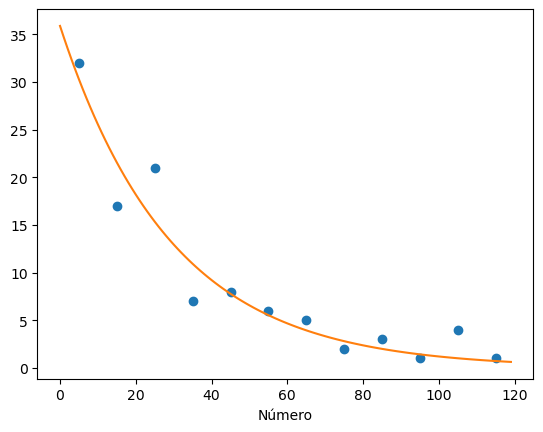

In [5]:
#d)
t = linspace(0,120, 120)
plt.plot(x, y,"o")
plt.plot(func(t,param[0],param[1]))
plt.xlabel('Número')
plt.ylabel('')

In [6]:
temp1 = 0
temp2 = 0
for i in range(len(x)):
    temp1 += (y[i] - func(x[i], param[0], param[1]))**2
    temp2 += (y[i] - sum(y)/len(y))**2
    
R_2 = 1 - temp1/temp2
R_2

0.9171636070691509

In [7]:
#e)
V_m = 1/param[1]
V_m

29.674854146824625

## Problema Regressão linear e o método dos mínimos quadráticos

In [8]:
#a)
z = log(y)

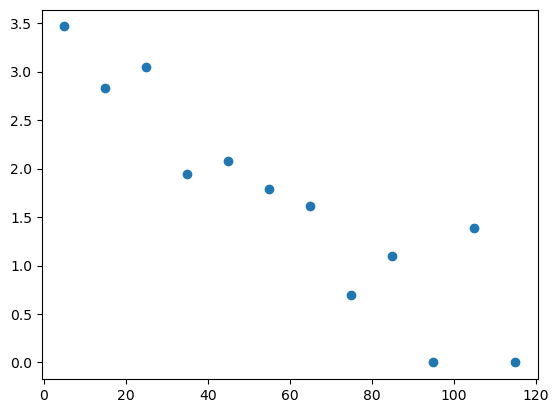

In [9]:
#b)
plt.plot(x, z, 'o')

In [10]:
#c)
temp1 = 0
temp2 = 0
for i in range(len(z)):
    temp1 += x[i]*(z[i] - sum(z)/len(z))
    temp2 += x[i]*(x[i] - sum(x)/len(x))
    
m = temp1/temp2
a = sum(z)/len(z) - m*sum(x)/len(x)

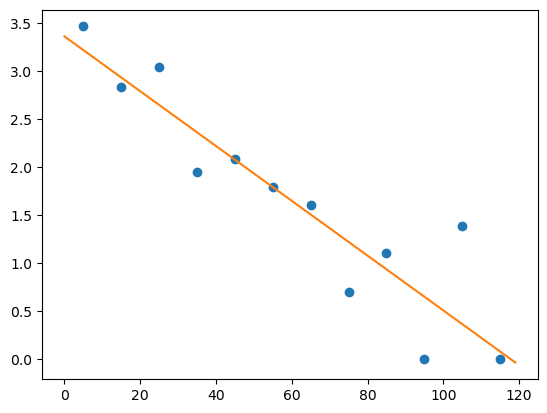

In [11]:
#d)
def f(t):
    global a, m
    return a + m*t
    
plt.plot(x, z, "o")
plt.plot(f(t))

In [12]:
V_m = -1/m
V_m

35.293515094837296

## Problema Ajuste de dados e erro experimental

In [13]:
#a)
dados = loadtxt('scattering.data')
x = dados[:,0]
y = dados[:,1]
z = dados[:,2]

Text(0, 0.5, 'Seção Transversal')

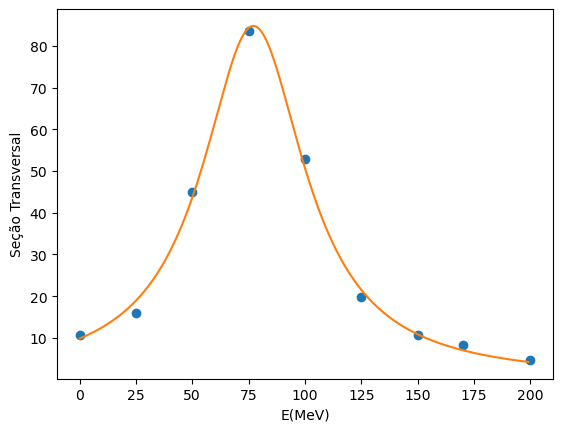

In [14]:
#b)
def func(E,fr,Er,gamma):
    return fr/((E - Er)**2 + gamma**2/4)

param, pcov = curve_fit(func,x, y)

t = linspace(0,200,200)
plt.plot(x, y,"o")
plt.plot(func(t,param[0],param[1], param[2]))
plt.xlabel('E(MeV)')
plt.ylabel('Seção Transversal')

In [15]:
err1 = abs(param[1]-78)/78
err2 = abs(abs(param[2])-55)/55
err1,err2

(0.006559027403227993, 0.019993216426068338)

<ErrorbarContainer object of 3 artists>

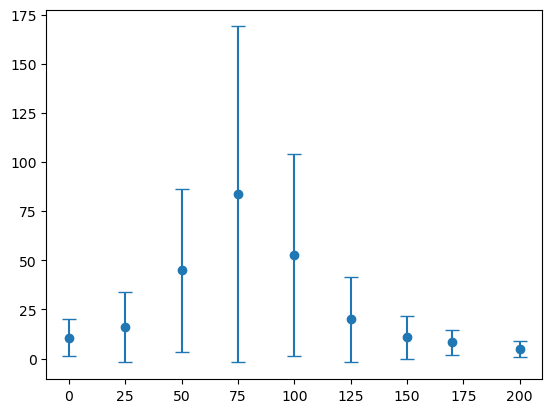

In [16]:
#c)
from pylab import errorbar

errorbar(x, y, yerr = z, fmt = 'o', capsize = 5)

d) O tamanho da barra de erro não é razoável, pois mostra que o os dados tem um erro muito grande. A informação da barra é improtante, porque ela vai mostrar o quão bom é método, pois mesmo que a interpolação aparentemente seja boa, com as barras de erro você consegue ver que o método não é tão bom assim.

Text(0, 0.5, 'Seção Transversal')

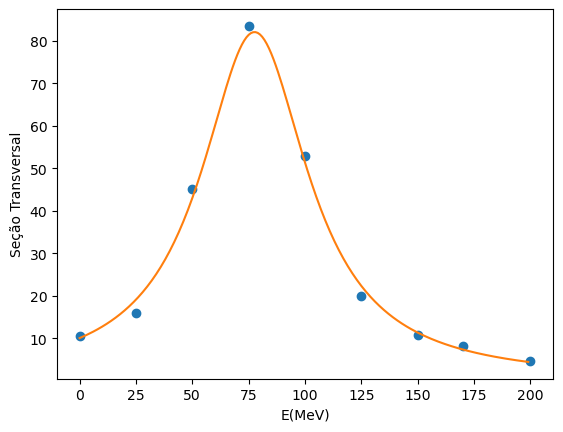

In [17]:
#e)
param, pcov = curve_fit(func, x, y, sigma= z)

plt.plot(x, y,"o")
plt.plot(func(t,param[0],param[1], param[2]))
plt.xlabel('E(MeV)')
plt.ylabel('Seção Transversal')

In [18]:
err1 = abs(param[1]-78)/78
err2 = abs(param[2]-55)/55
err1,err2

(9.53084299294387e-05, 0.0577559174478713)